<a href="https://colab.research.google.com/github/ruslanbakin/Pandas/blob/main/5laba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Постройте временной график, отражающий выкладывания видеороликов по часам в течение дня

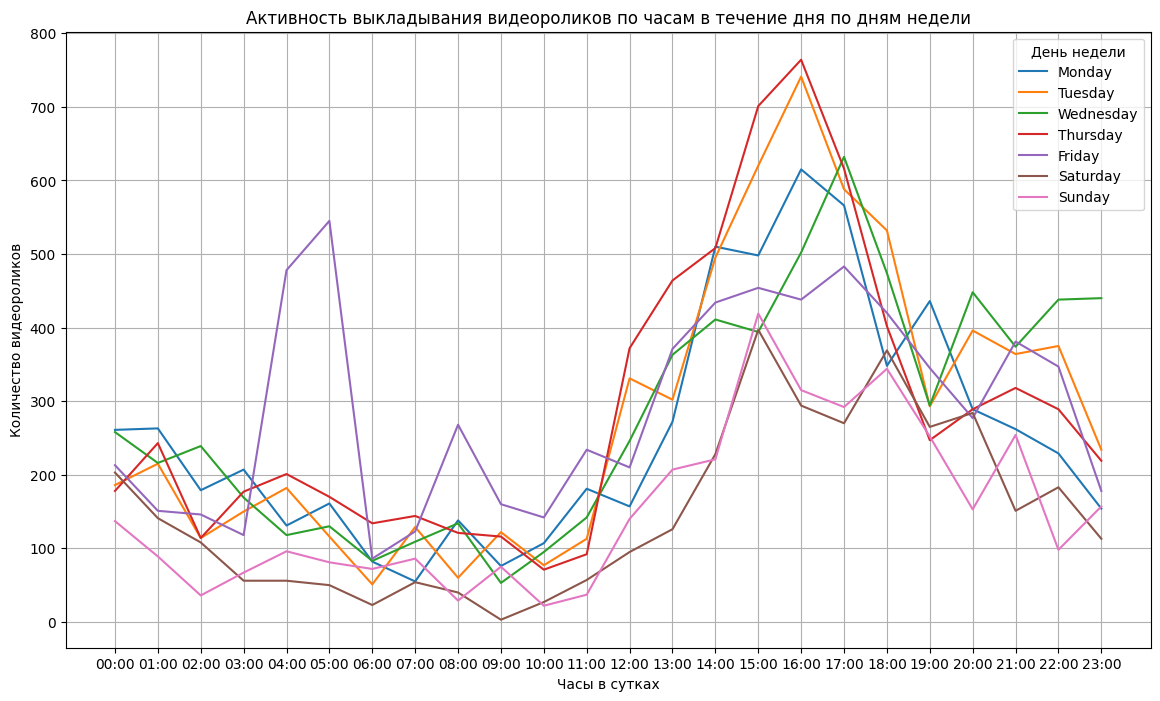

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

df = pd.read_csv('USvideos.csv')

df['publish_time'] = pd.to_datetime(df['publish_time'])

df['day_of_week'] = df['publish_time'].dt.day_name()
df['hour_of_day'] = df['publish_time'].dt.hour

pivot_table = df.pivot_table(index='hour_of_day', columns='day_of_week', aggfunc='size', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[days_order]

plt.figure(figsize=(14, 8))
for day in pivot_table.columns:
  plt.plot(pivot_table.index, pivot_table[day], label=calendar.day_name[days_order.index(day)])

plt.title('Активность выкладывания видеороликов по часам в течение дня по дням недели')
plt.xlabel('Часы в сутках')
plt.ylabel('Количество видеороликов')
plt.legend(title='День недели')
plt.xticks(range(24), labels=[f'{hour:02d}:00' for hour in range(24)])
plt.grid(True)
plt.show()

Создайте столбчатую диаграмму, отображающую самые активные часы

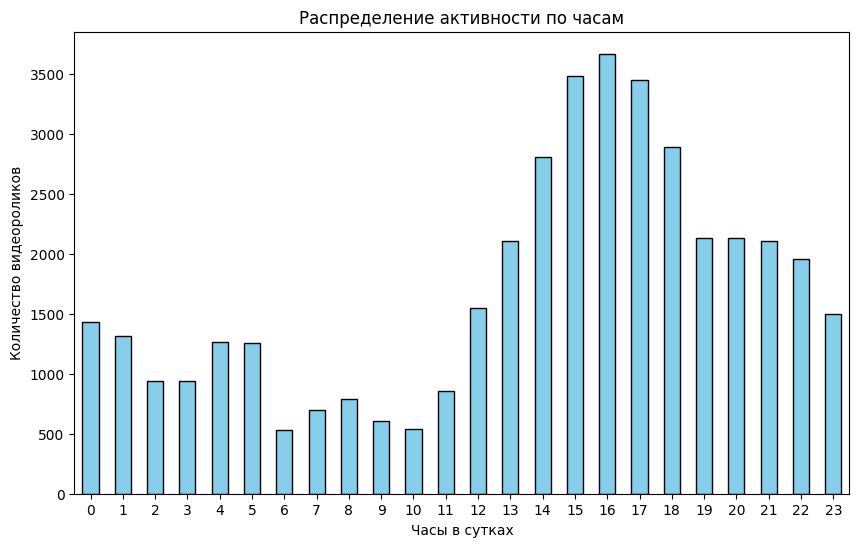

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

df = pd.read_csv('USvideos.csv')

df['publish_time'] = pd.to_datetime(df['publish_time'])

df['hour_of_day'] = df['publish_time'].dt.hour

plt.figure(figsize=(10, 6))
df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Распределение активности по часам')
plt.xlabel('Часы в сутках')
plt.ylabel('Количество видеороликов')
plt.xticks(rotation=0)
plt.show()

Сравнение лайков и дизлайков:

Создайте столбчатую диаграмму, сравнивающую количество лайков и дизлайков для трендовых видео.

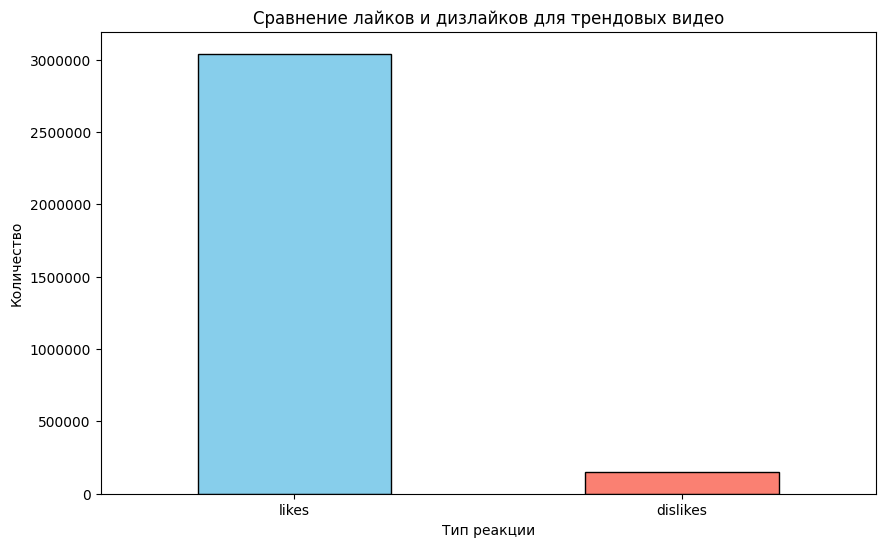

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('USvideos.csv')

plt.figure(figsize=(10, 6))
(df[['likes', 'dislikes']].sum() / 1000).plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Сравнение лайков и дизлайков для трендовых видео')
plt.xlabel('Тип реакции')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Постройте график, отображающую топ-10 каналов по суммарному числу просмотров

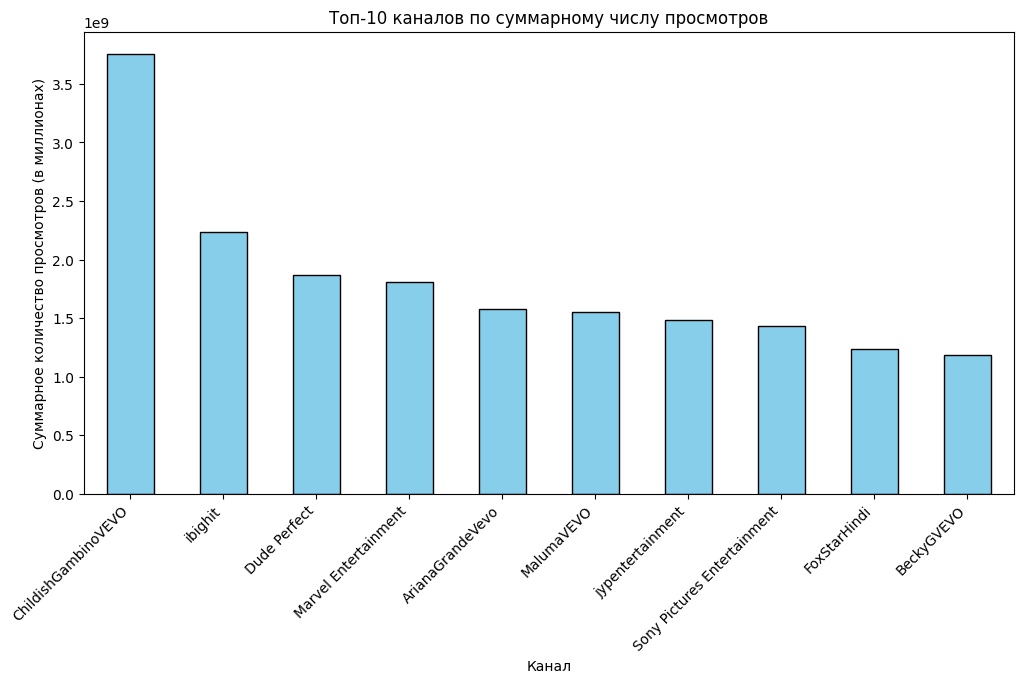

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('USvideos.csv')

top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_channels.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Топ-10 каналов по суммарному числу просмотров')
plt.xlabel('Канал')
plt.ylabel('Суммарное количество просмотров (в миллионах)')
plt.xticks(rotation=45, ha='right')

plt.show()

Выведите самые высокачастотные слова в названиях видео

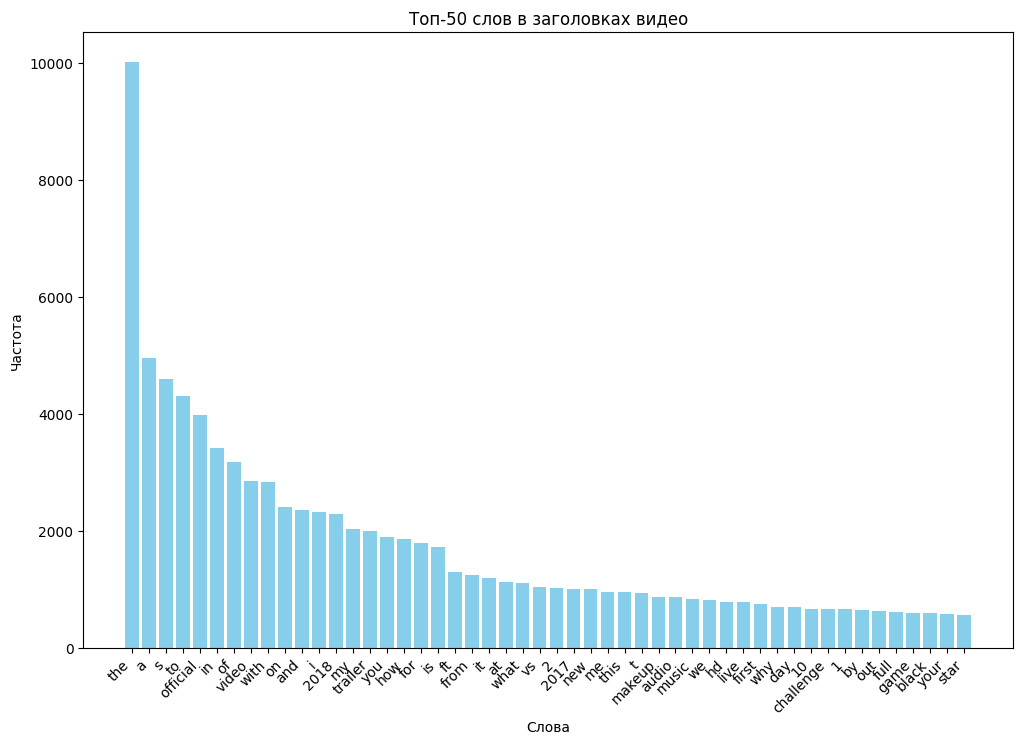

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re


df = pd.read_csv('USvideos.csv')


all_titles = ' '.join(df['title'].dropna())

cleaned_titles = re.sub(r'\W', ' ', all_titles.lower())


words = cleaned_titles.split()


word_freq = Counter(words)


top_words = dict(word_freq.most_common(50))


plt.figure(figsize=(12, 8))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Топ-50 слов в заголовках видео')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.show()

Сравнение среднего числа комментариев в зависимости от дня недели:

Создайте столбчатую диаграмму, отображающую среднее количество комментариев для каждого дня недели.


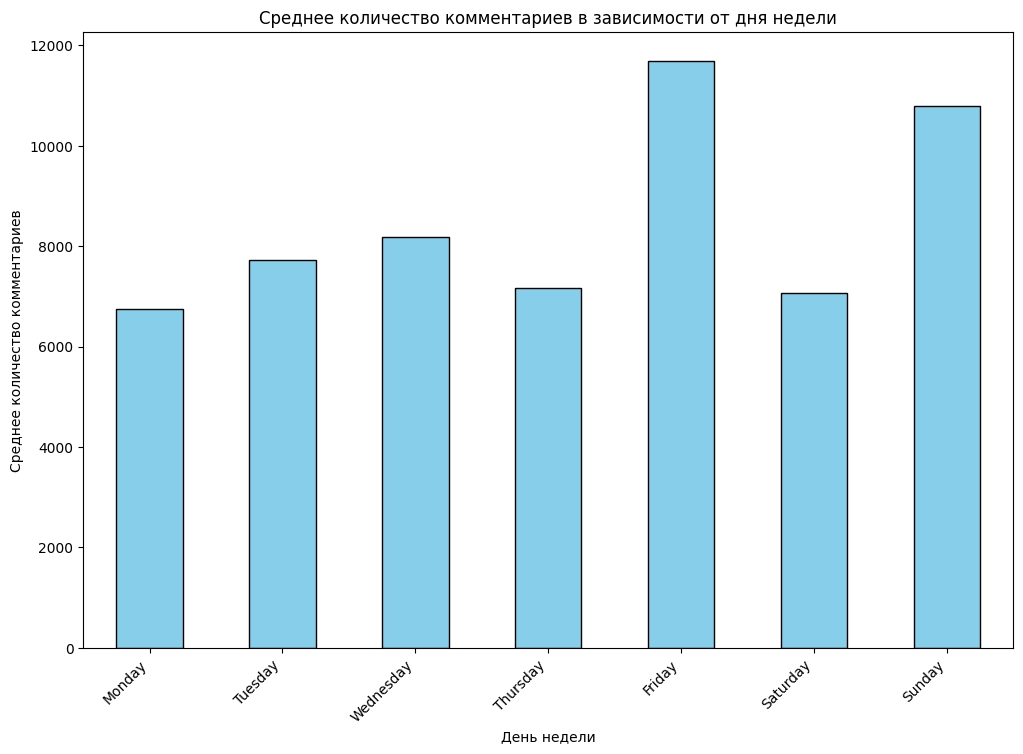

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('USvideos.csv')

df['publish_time'] = pd.to_datetime(df['publish_time'])

df['day_of_week'] = df['publish_time'].dt.day_name()

plt.figure(figsize=(12, 8))
avg_comments_by_day = df.groupby('day_of_week')['comment_count'].mean()
avg_comments_by_day = avg_comments_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

avg_comments_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Среднее количество комментариев в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество комментариев')
plt.xticks(rotation=45, ha='right')

plt.show()

Анализ соотношения видео с высоким и низким количеством просмотров:

Постройте круговую диаграмму, чтобы визуализировать соотношение видео с разными уровнями просмотров.

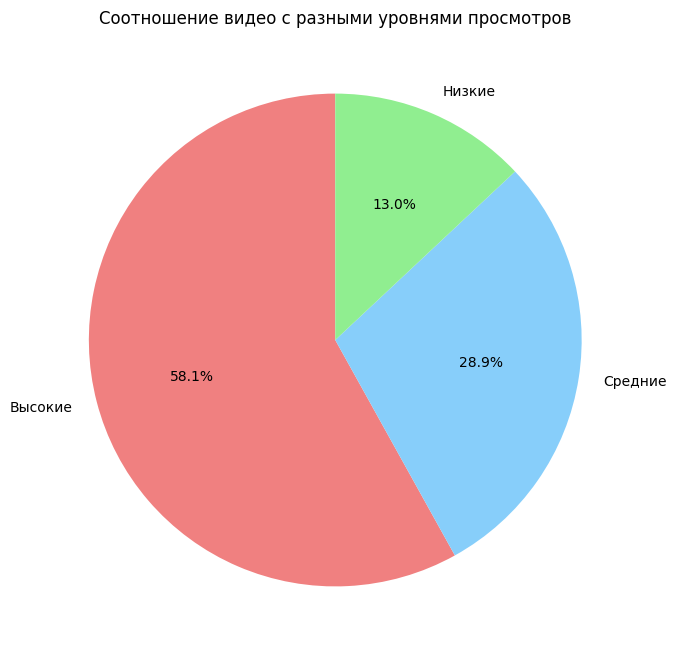

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('USvideos.csv')

view_thresholds = [0, 100000, 500000, float('inf')]

df['views_category'] = pd.cut(df['views'], bins=view_thresholds, labels=['Низкие', 'Средние', 'Высокие'])

views_counts = df['views_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(views_counts, labels=views_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Соотношение видео с разными уровнями просмотров')

plt.show()

Исследование изменений лайков и комментариев в зависимости от времени публикации:

Создайте график, на котором две линии будут отражать динамику изменений лайков и комментариев в различные часы суток.

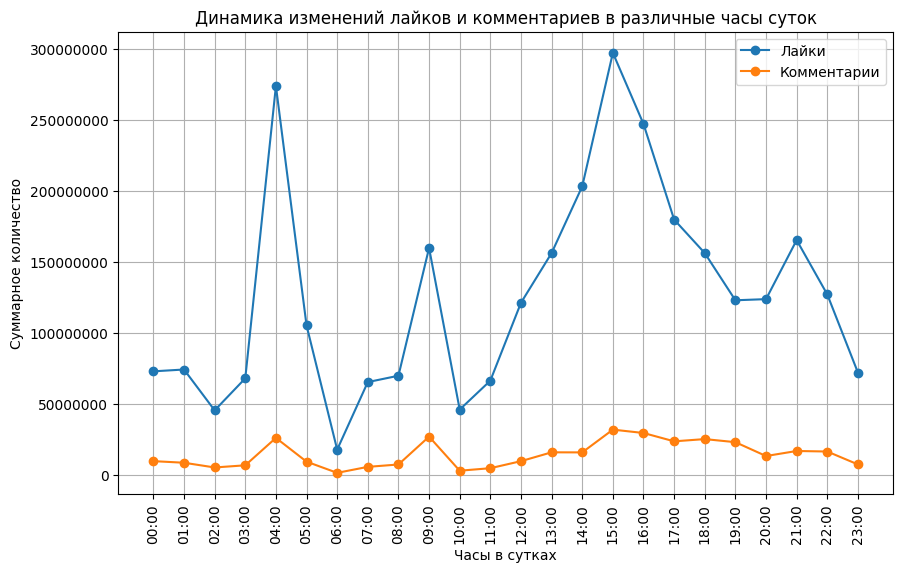

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('USvideos.csv')

df['publish_time'] = pd.to_datetime(df['publish_time'])

df['hour_of_day'] = df['publish_time'].dt.hour

pivot_table = df.pivot_table(index='hour_of_day', values=['likes', 'comment_count'], aggfunc='sum')

plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table['likes'], label='Лайки', marker='o')
plt.plot(pivot_table.index, pivot_table['comment_count'], label='Комментарии', marker='o')

plt.title('Динамика изменений лайков и комментариев в различные часы суток')
plt.xlabel('Часы в сутках')
plt.ylabel('Суммарное количество')
plt.legend()

plt.ticklabel_format(style='plain', axis='y')

plt.xticks(range(24), labels=[f'{hour:02d}:00' for hour in range(24)], rotation=90)

plt.grid(True)
plt.show()
